In [32]:
import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import SSA as ss
from datetime import datetime
import re

# Deploying API

In [5]:
pd.set_option('display.notebook_repr_html', True)
ticker = 'AAPL'
period1 = int(time.mktime(datetime(2015,10,28,20,1).timetuple()))
period2 = int(time.mktime(datetime(2021,11,28,20,1).timetuple()))
interval = '1d' #1w 1m 1y
url_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

print(url_string)
data = pd.read_csv(url_string,sep=r',')
data

https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1446084060&period2=1638151260&interval=1d&events=history&includeAdjustedClose=true


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-29,29.674999,30.172501,29.567499,30.132500,27.627592,204909200
1,2015-10-30,30.247499,30.305000,29.862499,29.875000,27.391495,197461200
2,2015-11-02,30.200001,30.340000,29.902500,30.295000,27.776579,128813200
3,2015-11-03,30.197500,30.872499,30.174999,30.642500,28.095198,182076000
4,2015-11-04,30.782499,30.955000,30.405001,30.500000,27.964544,179544400
...,...,...,...,...,...,...,...
1526,2021-11-19,157.649994,161.020004,156.529999,160.550003,160.550003,117305600
1527,2021-11-22,161.679993,165.699997,161.000000,161.020004,161.020004,117467900
1528,2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900
1529,2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1531 non-null   object 
 1   Open       1531 non-null   float64
 2   High       1531 non-null   float64
 3   Low        1531 non-null   float64
 4   Close      1531 non-null   float64
 5   Adj Close  1531 non-null   float64
 6   Volume     1531 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 83.9+ KB


# Index Selection

![table1](index.png)

In [7]:
x1 = data['Close'].to_numpy()
x2 = data['Open'].to_numpy()
x3 = data['High'].to_numpy()
x4 = data['Low'].to_numpy()
x5 = data['Volume'].to_numpy()

# Dataset filtering

Let's look up for the scree diagram of the Yahoo finance dataset

In [24]:
L = int(len(x1)/2)

Tiempo = 2022-01-06 16:49:03.142831
Tiempo= 2022-01-06 16:49:03.596571


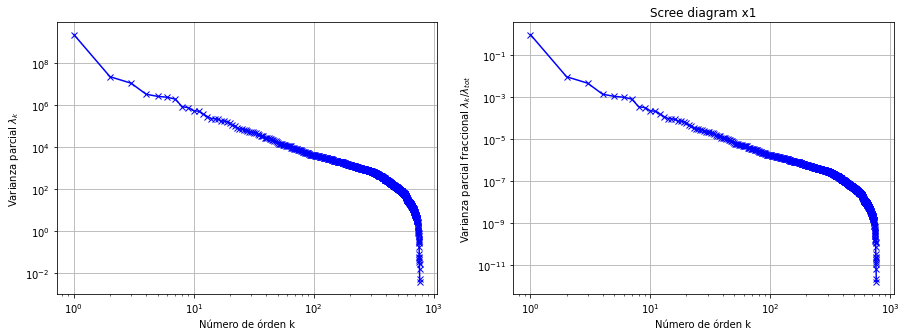

In [25]:
print('Tiempo =',str(datetime.now()))
l=ss.ScreeD(x1,L)
print('Tiempo=',str(datetime.now()))
k=np.arange(len(l))
k=k+1
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(k,l,'-x',color='blue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Número de órden k')
axs[0].set_ylabel(r'Varianza parcial $\lambda_k$')
axs[0].grid()

axs[1].plot(k,l/sum(l),'-x',color='blue')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Número de órden k')
axs[1].set_ylabel(r'Varianza parcial fraccional $\lambda_k/\lambda_{tot}$')
axs[1].grid()
plt.title('Scree diagram x1')
plt.show()

Tiempo = 2022-01-06 16:49:05.165674
Tiempo= 2022-01-06 16:49:05.606421


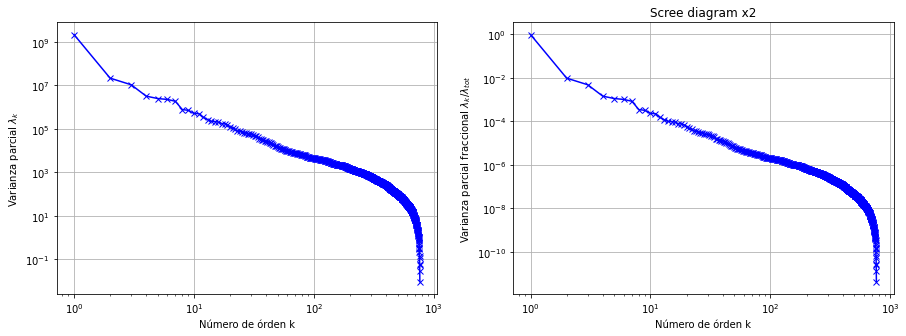

In [26]:
print('Tiempo =',str(datetime.now()))
l=ss.ScreeD(x2,L)
print('Tiempo=',str(datetime.now()))
k=np.arange(len(l))
k=k+1
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(k,l,'-x',color='blue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Número de órden k')
axs[0].set_ylabel(r'Varianza parcial $\lambda_k$')
axs[0].grid()

axs[1].plot(k,l/sum(l),'-x',color='blue')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Número de órden k')
axs[1].set_ylabel(r'Varianza parcial fraccional $\lambda_k/\lambda_{tot}$')
axs[1].grid()
plt.title('Scree diagram x2')
plt.show()

Tiempo = 2022-01-06 16:49:07.087576
Tiempo= 2022-01-06 16:49:07.529415


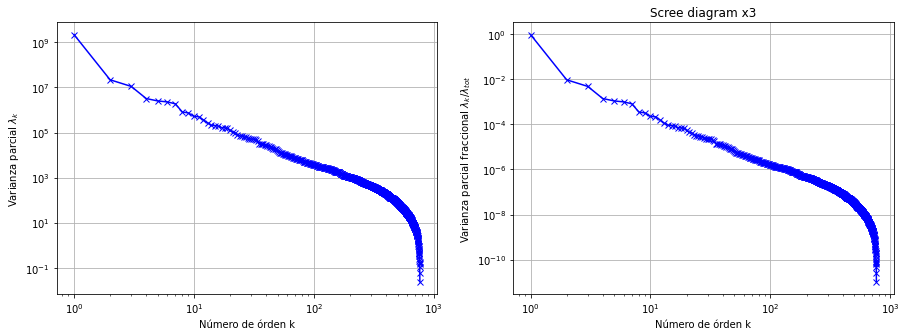

In [27]:
print('Tiempo =',str(datetime.now()))
l=ss.ScreeD(x3,L)
print('Tiempo=',str(datetime.now()))
k=np.arange(len(l))
k=k+1
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(k,l,'-x',color='blue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Número de órden k')
axs[0].set_ylabel(r'Varianza parcial $\lambda_k$')
axs[0].grid()

axs[1].plot(k,l/sum(l),'-x',color='blue')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Número de órden k')
axs[1].set_ylabel(r'Varianza parcial fraccional $\lambda_k/\lambda_{tot}$')
axs[1].grid()
plt.title('Scree diagram x3')
plt.show()

Tiempo = 2022-01-06 16:49:09.088524
Tiempo= 2022-01-06 16:49:09.478300


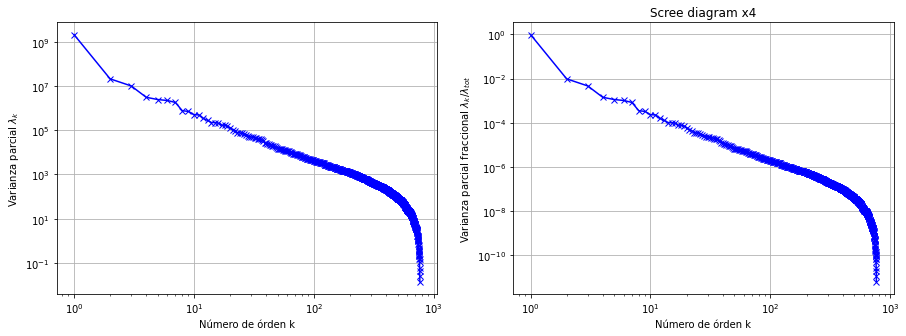

In [28]:
print('Tiempo =',str(datetime.now()))
l=ss.ScreeD(x4,L)
print('Tiempo=',str(datetime.now()))
k=np.arange(len(l))
k=k+1
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(k,l,'-x',color='blue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Número de órden k')
axs[0].set_ylabel(r'Varianza parcial $\lambda_k$')
axs[0].grid()

axs[1].plot(k,l/sum(l),'-x',color='blue')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Número de órden k')
axs[1].set_ylabel(r'Varianza parcial fraccional $\lambda_k/\lambda_{tot}$')
axs[1].grid()
plt.title('Scree diagram x4')
plt.show()

Tiempo = 2022-01-06 16:49:10.952458
Tiempo= 2022-01-06 16:49:15.874577


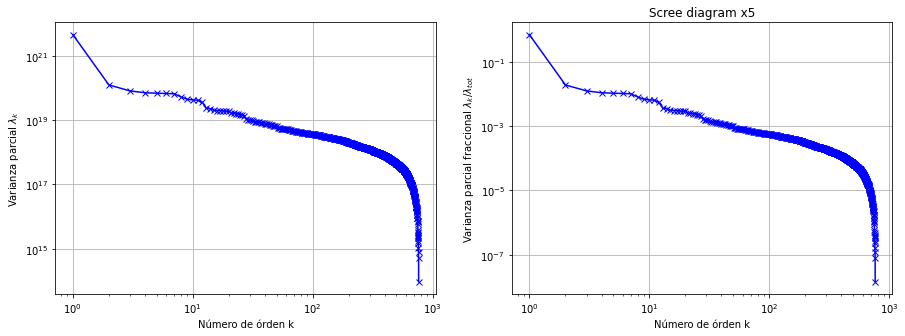

In [29]:
print('Tiempo =',str(datetime.now()))
l=ss.ScreeD(x5,L)
print('Tiempo=',str(datetime.now()))
k=np.arange(len(l))
k=k+1
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(k,l,'-x',color='blue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Número de órden k')
axs[0].set_ylabel(r'Varianza parcial $\lambda_k$')
axs[0].grid()

axs[1].plot(k,l/sum(l),'-x',color='blue')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Número de órden k')
axs[1].set_ylabel(r'Varianza parcial fraccional $\lambda_k/\lambda_{tot}$')
axs[1].grid()
plt.title('Scree diagram x5')
plt.show()

Now let's check the correlation matrix of these same index

# Get the SSA results from the base

In [43]:
def indexSSA(series,L,name):
    tin=datetime.now()
    print('Tiempo @ inicio =',str(datetime.now()))
    l,gklist,wMatrix = ss.SSA(series,L)
    tfin = datetime.now()
    print('Tiempo @ final =',str(datetime.now()))
    delta = tfin-tin
    sec,milisec = re.findall('\d+',str(delta))[2],re.findall('\d+',str(delta))[3]
    print(f'SSA de la serie {name} completado! Tomó {sec} sec con {milisec} milisec!')
    return l,gklist,wMatrix

In [44]:
for i in range(5):
    name = f'x{i+1}'
    lname,gkname,wMatname  = name + '_l',name+'_gklist',name+'_wMatrix'
    t1,t2,t3 = indexSSA(globals()[name],L,name)
    locals()[lname] =t1
    locals()[gkname] = t2
    locals()[wMatname] = t3

Tiempo @ inicio = 2022-01-06 17:01:32.755662
Tiempo @ final = 2022-01-06 17:01:57.792341
SSA de la serie x1 completado! Tomó 25 sec con 036679 milisec!
Tiempo @ inicio = 2022-01-06 17:01:57.793340
Tiempo @ final = 2022-01-06 17:02:22.259722
SSA de la serie x2 completado! Tomó 24 sec con 466382 milisec!
Tiempo @ inicio = 2022-01-06 17:02:22.259722
Tiempo @ final = 2022-01-06 17:02:46.738498
SSA de la serie x3 completado! Tomó 24 sec con 478776 milisec!
Tiempo @ inicio = 2022-01-06 17:02:46.738498
Tiempo @ final = 2022-01-06 17:03:11.038514
SSA de la serie x4 completado! Tomó 24 sec con 300016 milisec!
Tiempo @ inicio = 2022-01-06 17:03:11.038514
Tiempo @ final = 2022-01-06 17:03:35.276657
SSA de la serie x5 completado! Tomó 24 sec con 238143 milisec!


In [49]:
x1_gklist.shape

(765, 1531)

# Correlation matrix

## x1 closing

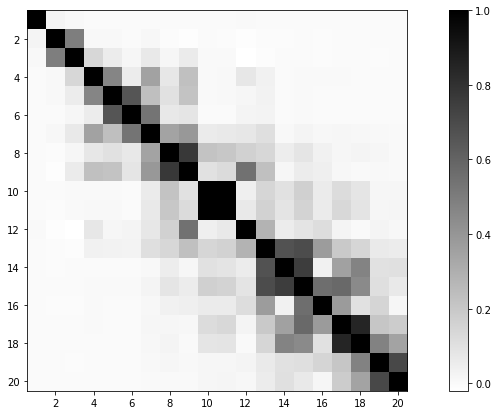

In [50]:
x=np.arange(1, 20, 2)
y=x+1
plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar
plt.imshow(x1_wMatrix,cmap=plt.cm.binary);
plt.colorbar()
plt.xticks(x,y)
plt.yticks(x,y)
plt.show()

## x2 opening

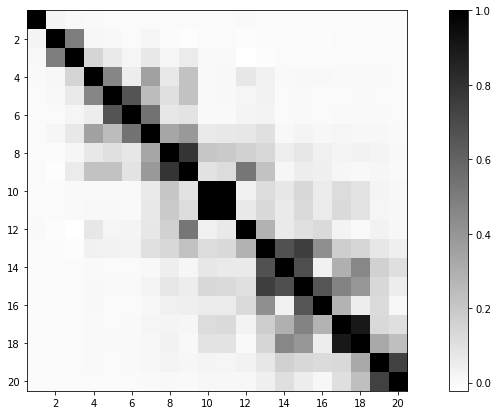

In [51]:
x=np.arange(1, 20, 2)
y=x+1
plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar
plt.imshow(x2_wMatrix,cmap=plt.cm.binary);
plt.colorbar()
plt.xticks(x,y)
plt.yticks(x,y)
plt.show()

## x3 Highest 

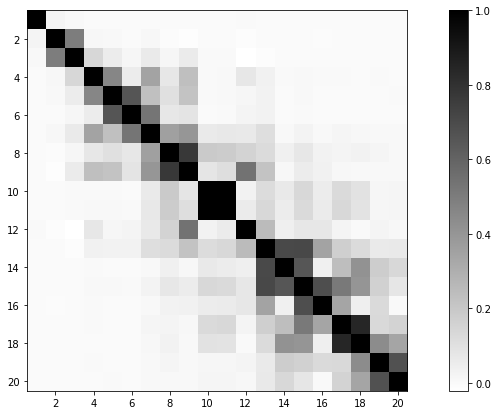

In [52]:
x=np.arange(1, 20, 2)
y=x+1
plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar
plt.imshow(x3_wMatrix,cmap=plt.cm.binary);
plt.colorbar()
plt.xticks(x,y)
plt.yticks(x,y)
plt.show()

## x4 Lowest

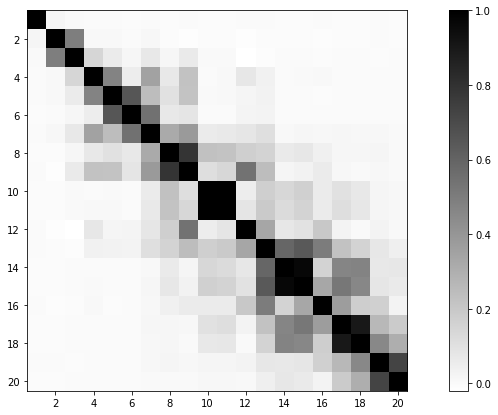

In [54]:
x=np.arange(1, 20, 2)
y=x+1
plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar
plt.imshow(x4_wMatrix,cmap=plt.cm.binary);
plt.colorbar()
plt.xticks(x,y)
plt.yticks(x,y)
plt.show()

## x5 Volume

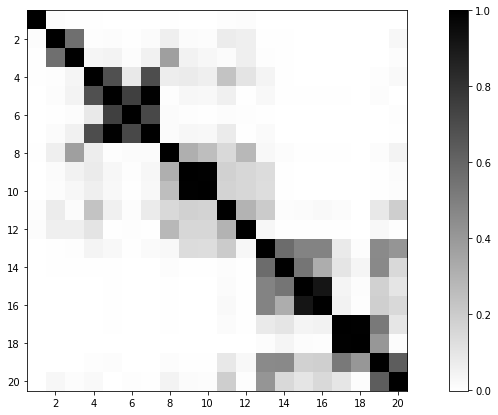

In [55]:
x=np.arange(1, 20, 2)
y=x+1
plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar
plt.imshow(x5_wMatrix,cmap=plt.cm.binary);
plt.colorbar()
plt.xticks(x,y)
plt.yticks(x,y)
plt.show()

# gk[0] (trend) vs series

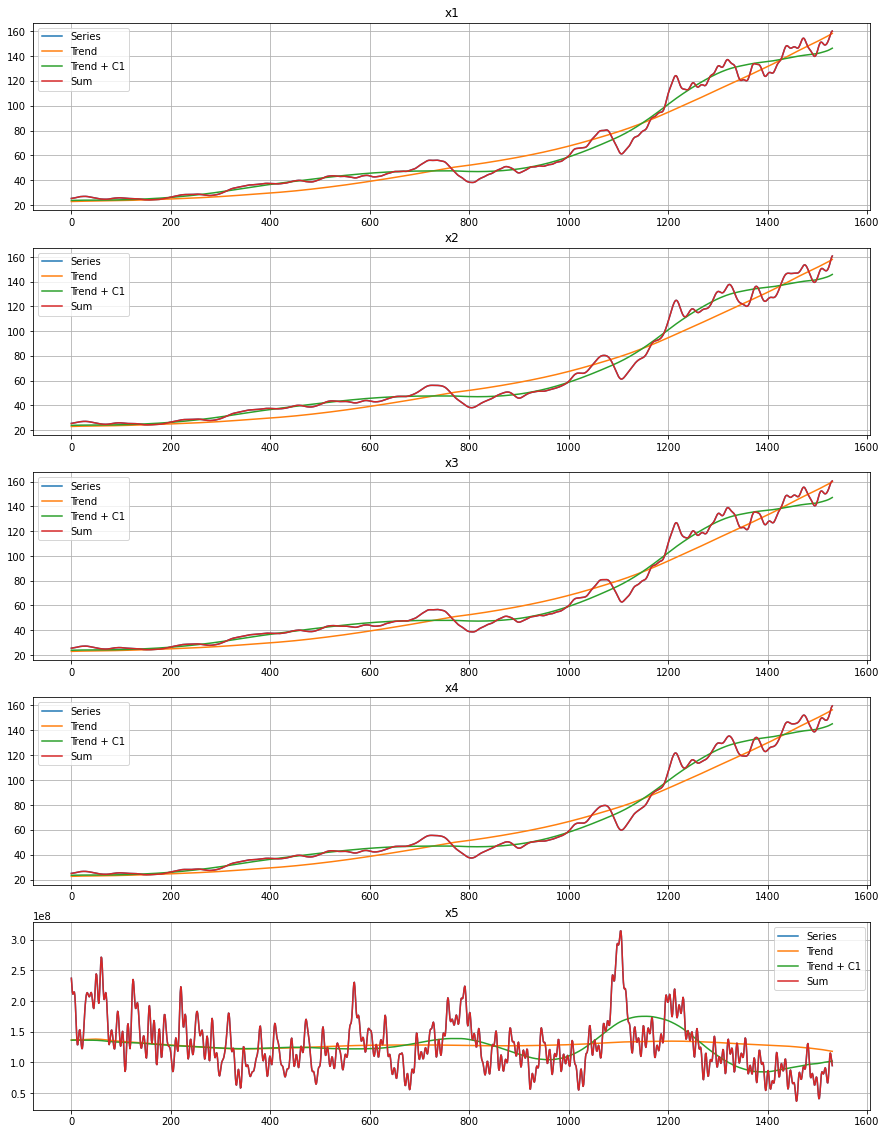

In [169]:
fig, ax = plt.subplots(5,1,figsize=(15,20))
max_comp = 30
for i in range(5):
    name = f"x{i+1}"
    name_ssa = name + "_gklist"
    ax[i].plot(globals()[name],label='Series')
    ax[i].plot(globals()[name_ssa][0],label='Trend')
    ax[i].plot(globals()[name_ssa][0] + globals()[name_ssa][1] + globals()[name_ssa][2] ,label='Trend + C1')
    #Find optimal elements
    
    Filtered = [element for element in globals()[name_ssa][0:max_comp] ]
    ax[i].plot(sum(Filtered),label='Sum')
    ax[i].set_title(f'{name}')
    ax[i].grid()
    ax[i].legend()

# The "optimal" filtered series given the first elements of the decomposition of SSA will be the new index used to calculate the next complex index

In [118]:
for i in range(5):
    name = f'x{i+1}'
    name_ssa = name + "_gklist"
    Filtered = [element for element in globals()[name_ssa][0:max_comp] ]
    locals()[name] = sum(Filtered)

In [119]:
# 5-day average trading volume ATV(5)
x6 = np.zeros(len(x5)-4)
for i in range(len(x5)-4):
    prom = sum(x5[i:i+5])/5
    x6[i] = prom

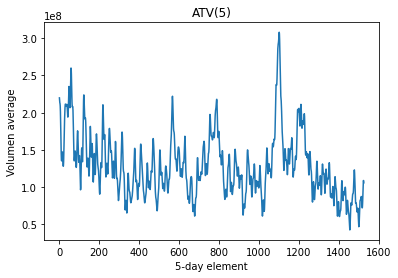

In [121]:
plt.plot(x6)
plt.title('ATV(5)')
plt.xlabel('5-day element')
plt.ylabel('Volumen average')
plt.show()

In [122]:
#20-day average trading volume ATV(20)
x7 = np.zeros(len(x5)-19)
for i in range(len(x5)-19):
    prom = sum(x5[i:i+20])/20
    x7[i] = prom

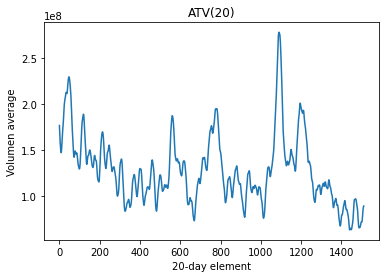

In [123]:
plt.plot(x7)
# plt.plot(x5)
plt.title('ATV(20)')
plt.xlabel('20-day element')
plt.ylabel('Volumen average')
plt.show()

In [124]:
#5-day moving average MA(5)
x8 = np.zeros(len(x2)-4)
for i in range(len(x2)-4):
    prom = sum(x2[i:i+5])/5
    x8[i] = prom

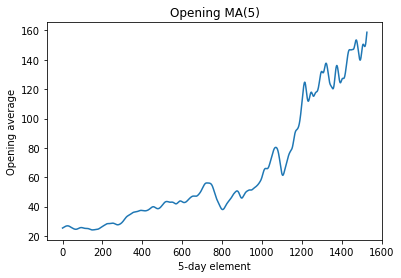

In [125]:
plt.plot(x8)
# plt.plot(x1)
plt.title('Opening MA(5)')
plt.xlabel('5-day element')
plt.ylabel('Opening average')
plt.show()

In [126]:
#20-day moving average MA(20)
x9 = np.zeros(len(x2)-19)
for i in range(len(x2)-19):
    prom = sum(x2[i:i+20])/20
    x9[i] = prom

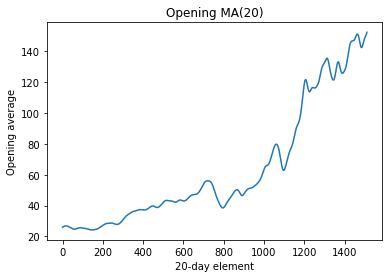

In [127]:
plt.plot(x9)
# plt.plot(x1)
plt.title('Opening MA(20)')
plt.xlabel('20-day element')
plt.ylabel('Opening average')
plt.show()

In [128]:
#12-day exponential moving average EXMA(12)
x10 = np.zeros(len(x2))
s = 2/(12+1)
x10[0] = sum(x1[:12])/12
for i in range(len(x2)-1):
    EMAi = x1[i+1]*s + x10[i]*(1-s)  
    x10[i+1] = EMAi

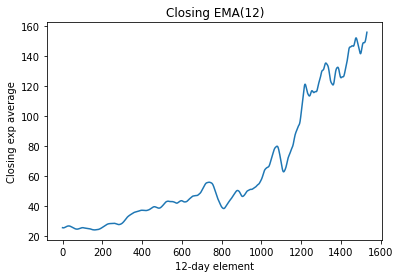

In [129]:
plt.plot(x10)
plt.title('Closing EMA(12)')
plt.xlabel('12-day element')
plt.ylabel('Closing exp average')
plt.show()

$$EMA_t = [V_t (\frac{s}{1+d})]+EMA_y[1-(\frac{s}{1+d})]$$

$s:=$ 2/selected time period+1

$V_t:=$ value today

$d:=$ number of days

$EMA_y:=$ EMA yesterday

In [130]:
#26-day exponential moving average EXMA(26)
x11aux = np.zeros(len(x1))
s = 2/(26+1)
x11aux[0] = sum(x1[0:26])/26
for i in range(len(x2)-1):
    EMAi = x1[i+1]*s + x11aux[i]*(1-s)  
    x11aux[i+1] = EMAi
#MACD
x11= x10-x11aux

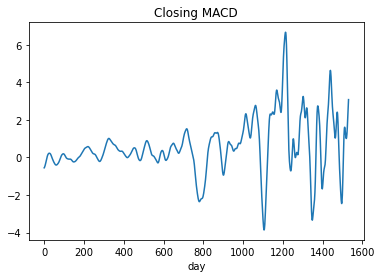

In [131]:
plt.plot(x11)
plt.title('Closing MACD')
plt.xlabel('day')
plt.show()

### MACD = 12-Period EMA - 26-Period EMA

In [132]:
gain = -data['Open']+data['Close']

In [133]:
gain.to_numpy()

array([ 0.457501, -0.372499,  0.094999, ...,  0.290009,  1.190002,
       -2.760009])

In [134]:
tgain = np.zeros(len(gain))
tloss = np.zeros(len(gain))
for i in range(len(gain)):
    if gain[i] >=0:
        tgain[i] = gain[i]
    else:
        tloss[i] = abs(gain[i])
    

In [135]:
tgain

array([0.457501, 0.      , 0.094999, ..., 0.290009, 1.190002, 0.      ])

In [136]:
tloss

array([0.      , 0.372499, 0.      , ..., 0.      , 0.      , 2.760009])

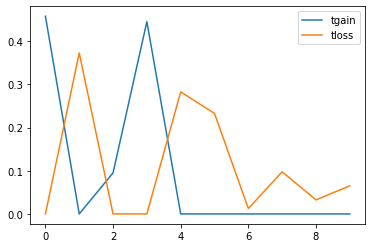

In [137]:
plt.plot(tgain[:10],label='tgain')
plt.plot(tloss[:10],label='tloss')
plt.legend()
plt.show()

In [138]:
favg_gain = np.zeros(len(tgain)-8)
for i in range(len(tgain)-8):
    prom = sum(tgain[i:i+9])/9
    favg_gain[i] = prom
favg_loss = np.zeros(len(tloss)-8)
for i in range(len(tloss)-8):
    prom = sum(tloss[i:i+9])/9
    favg_loss[i] = prom

avg_gain = np.zeros(len(tgain))
avg_loss = np.zeros(len(tgain))
avg_gain[0] = favg_gain[0]
avg_loss[0] = favg_loss[0]
x12 = np.zeros(len(tgain))
for i in range(len(tgain)-1):
    avgai = ( tgain[i+1] + avg_gain[i]*(8)  )/9
    avloss = ( tloss[i+1] + avg_loss[i]*(8)  )/9
    avg_gain[i+1] = avgai
    avg_loss[i+1] = avloss
    RS = avgai/avloss
    RSIi = 100-100/(1+RS)
    x12[i+1] = RSIi

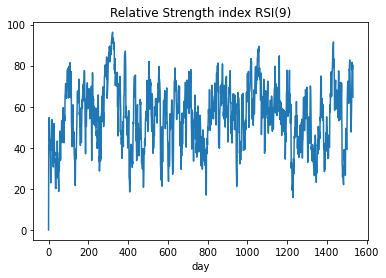

In [139]:
plt.plot(x12)
plt.title('Relative Strength index RSI(9)')
plt.xlabel('day')
plt.show()

In [140]:
def ADX(data, period):
    """
    Computes the ADX indicator.
    """
    
    df = data.copy()
    alpha = 1/period

    # TR
    df['H-L'] = df['High'] - df['Low']
    df['H-C'] = np.abs(df['High'] - df['Close'].shift(1))
    df['L-C'] = np.abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
    del df['H-L'], df['H-C'], df['L-C']

    # ATR
    df['ATR'] = df['TR'].ewm(alpha=alpha, adjust=False).mean()

    # +-DX
    df['H-pH'] = df['High'] - df['High'].shift(1)
    df['pL-L'] = df['Low'].shift(1) - df['Low']
    df['+DX'] = np.where(
        (df['H-pH'] > df['pL-L']) & (df['H-pH']>0),
        df['H-pH'],
        0.0
    )
    df['-DX'] = np.where(
        (df['H-pH'] < df['pL-L']) & (df['pL-L']>0),
        df['pL-L'],
        0.0
    )
    del df['H-pH'], df['pL-L']

    # +- DMI
    df['S+DM'] = df['+DX'].ewm(alpha=alpha, adjust=False).mean()
    df['S-DM'] = df['-DX'].ewm(alpha=alpha, adjust=False).mean()
    df['+DMI'] = (df['S+DM']/df['ATR'])*100
    df['-DMI'] = (df['S-DM']/df['ATR'])*100
    del df['S+DM'], df['S-DM']

    # ADX
    df['DX'] = (np.abs(df['+DMI'] - df['-DMI'])/(df['+DMI'] + df['-DMI']))*100
    df['ADX'] = df['DX'].ewm(alpha=alpha, adjust=False).mean()
    del df['DX'], df['ATR'], df['TR'], df['-DX'], df['+DX'], df['+DMI'], df['-DMI']

    return df

In [141]:
Adx = ADX(data,14)
x13 = Adx['ADX'].to_numpy()

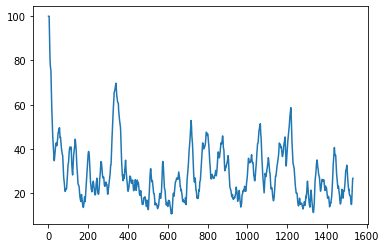

In [142]:
plt.plot(x13)

# DataBase

In [143]:
Base1 = pd.DataFrame()

In [144]:
for i in range(13):
    name = 'x'+f'{i+1}'
    index = globals()[name] 
    Base1[name] = index[0:1512]

In [145]:
Base1

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,25.306999,25.275367,25.523534,25.058175,2.369821e+08,2.198950e+08,1.764895e+08,25.415996,26.006652,25.697188,-0.552439,0.000000,NaN
1,25.362361,25.343929,25.588586,25.117523,2.247941e+08,2.154165e+08,1.710621e+08,25.487869,26.081121,25.645676,-0.538227,40.771509,100.000000
2,25.421523,25.414564,25.651094,25.177879,2.146436e+08,2.133687e+08,1.659457e+08,25.561253,26.154283,25.611191,-0.516240,43.545875,100.000000
3,25.482322,25.486030,25.711478,25.242001,2.110092e+08,2.121754e+08,1.613346e+08,25.636491,26.225745,25.591365,-0.488280,54.722463,100.000000
4,25.545420,25.560092,25.769281,25.309277,2.120459e+08,2.090303e+08,1.572284e+08,25.713811,26.295155,25.584296,-0.455776,47.943644,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,151.147583,150.243126,152.236730,149.377195,7.142915e+07,8.052970e+07,8.453759e+07,150.595432,150.705837,147.179666,1.133148,65.721451,22.988740
1508,151.205086,150.628849,152.429835,149.768130,8.029679e+07,8.242413e+07,8.663389e+07,150.598008,151.078666,147.798961,1.370328,65.647998,22.311998
1509,151.032740,150.794201,152.356667,149.935011,8.436633e+07,8.280151e+07,8.795234e+07,150.453340,151.499896,148.296466,1.526787,61.690217,21.418292
1510,150.700174,150.758452,152.086660,149.903820,8.429986e+07,8.309130e+07,8.868280e+07,150.207779,151.966636,148.666267,1.605441,71.949037,21.806410


In [147]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-29,29.674999,30.172501,29.567499,30.132500,27.627592,204909200
1,2015-10-30,30.247499,30.305000,29.862499,29.875000,27.391495,197461200
2,2015-11-02,30.200001,30.340000,29.902500,30.295000,27.776579,128813200
3,2015-11-03,30.197500,30.872499,30.174999,30.642500,28.095198,182076000
4,2015-11-04,30.782499,30.955000,30.405001,30.500000,27.964544,179544400
...,...,...,...,...,...,...,...
1526,2021-11-19,157.649994,161.020004,156.529999,160.550003,160.550003,117305600
1527,2021-11-22,161.679993,165.699997,161.000000,161.020004,161.020004,117467900
1528,2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900
1529,2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600


In [146]:
for i in range(13):
    name = 'x'+f'{i+1}'
    index = globals()[name]
    print(index.shape)

(1531,)
(1531,)
(1531,)
(1531,)
(1531,)
(1527,)
(1512,)
(1527,)
(1512,)
(1531,)
(1531,)
(1531,)
(1531,)


# Error between filtered and og series

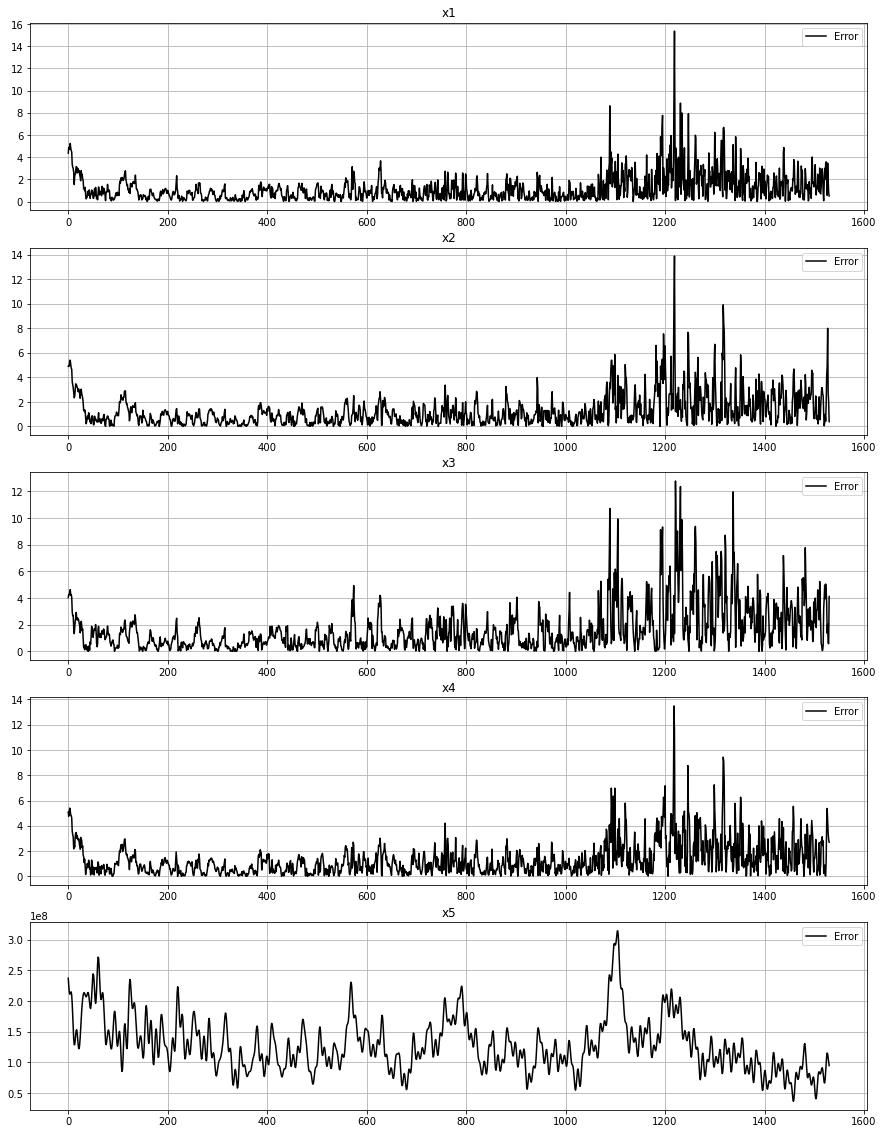

In [168]:
fig, ax = plt.subplots(5,1,figsize=(15,20))
max_comp = 30
for i in range(5):
    name = f"x{i+1}"
    col = data.columns
    name_ssa = name + "_gklist"
    Filtered = [element for element in globals()[name_ssa][0:max_comp] ]
    ax[i].plot(abs(data[col[i+1]].to_numpy()-sum(Filtered)),label='Error',c='black')
    ax[i].set_title(f'{name}')
    ax[i].grid()
    ax[i].legend()